# Support Vector Machine
## Research Question: "Predict whether a stop and search will conclude in police action".

#### In this notebook we attempt to answer the research question using the data set (https://www.kaggle.com/sohier/london-police-records?select=london-stop-and-search.csv). Specifically, we will attempt to answer it by using Support Vector Machine to classify the data points on the target ("Outcome" of the stop and search).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import util
import util_smote as usm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

from imblearn.over_sampling import SMOTE

In [2]:
police_actions_simple = ["Article Found", "Resolved", "Nothing",
                         "Cautioned", "Drug Warning", "Penalty Notice", "Arrested", "Summonsed"]

def evaluate(model, X_train, y_train, X_test, y_test, target_classes=police_actions_simple, average='weighted', binary=False, rotation=90, fontsize=18):
    print(f"Accurancy Score (Train): {int(np.around(model.score(X_train, y_train), 2) * 100)}%")
    print(f"Accuracy Score (Test): {int(np.around(model.score(X_test, y_test), 2) * 100)}%")
    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)
    print(f"\nPrecision Score (Train): {int(np.around(precision_score(y_train, y_train_predictions, average=average), 2) * 100)}%")
    print(f"Precision Score (Test): {int(np.around(precision_score(y_test, y_test_predictions, average=average), 2) * 100)}%")
    print(f"\nRecall Score (Train): {int(np.around(recall_score(y_train, y_train_predictions, average=average), 2) * 100)}%")
    print(f"Recall Score (Test): {int(np.around(recall_score(y_test, y_test_predictions, average=average), 2) * 100)}%")
    print(f"\nF1 Score (Train): {int(np.around(f1_score(y_train, y_train_predictions, average=average), 2) * 100)}%")
    print(f"F1 Score (Test): {int(np.around(f1_score(y_test, y_test_predictions, average=average), 2) * 100)}%")
    print(f"\nMCC (Train): {matthews_corrcoef(y_train, y_train_predictions)}")
    print(f"MCC (Test): {matthews_corrcoef(y_test, y_test_predictions)}")
    print("\n Confusion Matrix")
    if binary:
        util.confusion_plot(y_test=y_test, y_predictions=y_test_predictions, target_classes=["No Action", "Action"], rotation=rotation, fontsize=fontsize)
    else:
        util.confusion_plot(y_test=y_test, y_predictions=y_test_predictions, target_classes=target_classes, rotation=rotation, fontsize=fontsize)

## Cleaning the Data set

In [3]:
data = pd.read_csv("data.csv", low_memory = False)

data = util.data_cleaner(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165651 entries, 0 to 302621
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   Type                       165651 non-null  object             
 1   Date                       165651 non-null  datetime64[ns, UTC]
 2   Latitude                   165651 non-null  float64            
 3   Longitude                  165651 non-null  float64            
 4   Gender                     165651 non-null  object             
 5   Age range                  165651 non-null  object             
 6   Officer-defined ethnicity  165651 non-null  object             
 7   Legislation                165651 non-null  object             
 8   Object of search           165651 non-null  object             
 9   Outcome                    165651 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory 

## Encoding Values

In [4]:
data_encoded, encoders = util.data_encoder(data)
data_encoded.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,6
1,1,0,51.512286,-0.114491,1,1,0,4,8,6
2,1,1,51.512286,-0.114491,1,1,4,4,8,6
4,0,2,51.512286,-0.114491,1,1,4,4,8,6
5,1,3,51.512286,-0.114491,1,1,0,3,3,2


## Split data into train and test

In [5]:
# Split into features and target
target = data_encoded["Outcome"]
features = data_encoded.drop('Outcome', axis=1)


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

## Train the Support Vector Machine

The raw SVM takes too long to compute so I will apply preprocessing to normalise the features.

## Split the features in the range -1 to 1

In [6]:
#Process to normalise the data to [-1,1]
#Processing technique from: https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution

from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [7]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

Accurancy Score (Train): 65%
Accuracy Score (Test): 65%

Precision Score (Train): 43%
Precision Score (Test): 42%

Recall Score (Train): 65%
Recall Score (Test): 65%

F1 Score (Train): 52%
F1 Score (Test): 51%

MCC (Train): 0.0
MCC (Test): 0.0

 Confusion Matrix


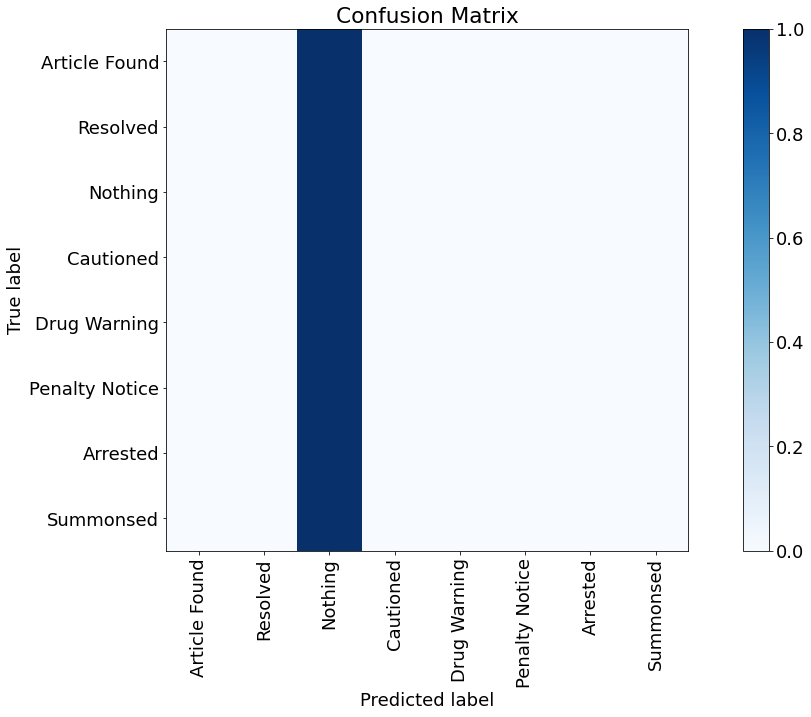

In [8]:
evaluate(model=svm, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

If the data is linearly inseperatable, then it is better to use a RBF kernel.

## Investigating different Kernels

In [9]:
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)

Accurancy Score (Train): 66%
Accuracy Score (Test): 65%

Precision Score (Train): 55%
Precision Score (Test): 51%

Recall Score (Train): 66%
Recall Score (Test): 65%

F1 Score (Train): 52%
F1 Score (Test): 51%

 Confusion Matrix


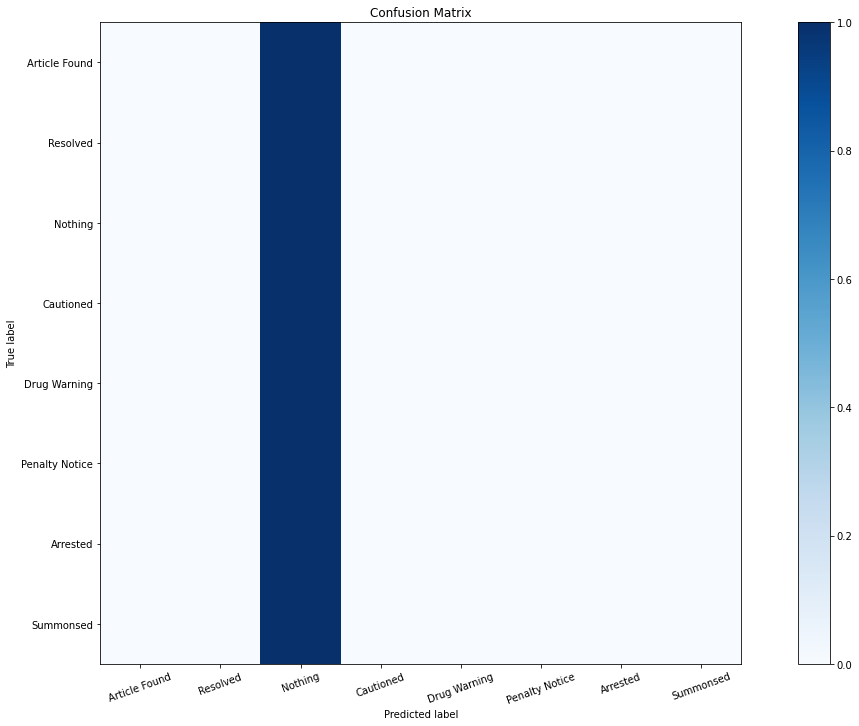

In [13]:
evaluate(model=svm, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

This only yielded a marginally better training score.

## Split target into "Police Action" (1) and "No Action" (0)

I will try to repeat the above process, but instead of the target being split into eight classes, I split it into two: either there was police action after the stop and search, or there wasn't.

In [14]:
#Replace all values in Outcome column, with 0 if "Nothing found - no further action", else 1.
# Reference for dictionary idea to replace values: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
outcome_splitter = {
    "Nothing found - no further action": 0, 
    "Article found - Detailed outcome unavailable": 1, 
    "Local resolution": 1,
    "Offender cautioned": 1,
    "Offender given drugs possession warning": 1,
    "Offender given penalty notice": 1,
    "Suspect arrested": 1,
    "Suspect summonsed to court": 1
    }
data_binary = data.applymap(lambda s: outcome_splitter.get(s) if s in outcome_splitter else s)
data_binary.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
1,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
2,Person search,2015-03-02 18:45:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
4,Person and Vehicle search,2015-03-03 15:50:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
5,Person search,2015-03-03 20:20:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0


In [15]:
data_binary_encoded, encoders_binary = util.data_encoder(data_binary)

print(encoders_binary)
data_binary_encoded.head()

{'Type Encoder': LabelEncoder(), 'Date Encoder': LabelEncoder(), 'Gender Encoder': LabelEncoder(), 'Age range Encoder': LabelEncoder(), 'Officer-defined ethnicity Encoder': LabelEncoder(), 'Legislation Encoder': LabelEncoder(), 'Object of search Encoder': LabelEncoder(), 'Outcome Encoder': LabelEncoder()}


,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,1
1,1,0,51.512286,-0.114491,1,1,0,4,8,1
2,1,1,51.512286,-0.114491,1,1,4,4,8,1
4,0,2,51.512286,-0.114491,1,1,4,4,8,1
5,1,3,51.512286,-0.114491,1,1,0,3,3,0


In [16]:
# Split into features and target
target_binary = data_binary_encoded["Outcome"]
features_binary = data_binary_encoded.drop('Outcome', axis=1)

# Split into train and test
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(features_binary, target_binary, test_size=0.2, random_state=10)

#Process to normalise the data to [-1,1]
#Processing technique from: https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution
X_train_binary = preprocessing.scale(X_train_binary)
X_test_binary = preprocessing.scale(X_test_binary)

In [17]:
svm_binary = SVC(kernel = 'linear')
svm_binary.fit(X_train_binary, y_train_binary) 

SVC(kernel='linear')

Accurancy Score (Train): 0%
Accuracy Score (Test): 0%

Precision Score (Train): 0%
Precision Score (Test): 0%

Recall Score (Train): 0%
Recall Score (Test): 0%

F1 Score (Train): 0%
F1 Score (Test): 0%

 Confusion Matrix


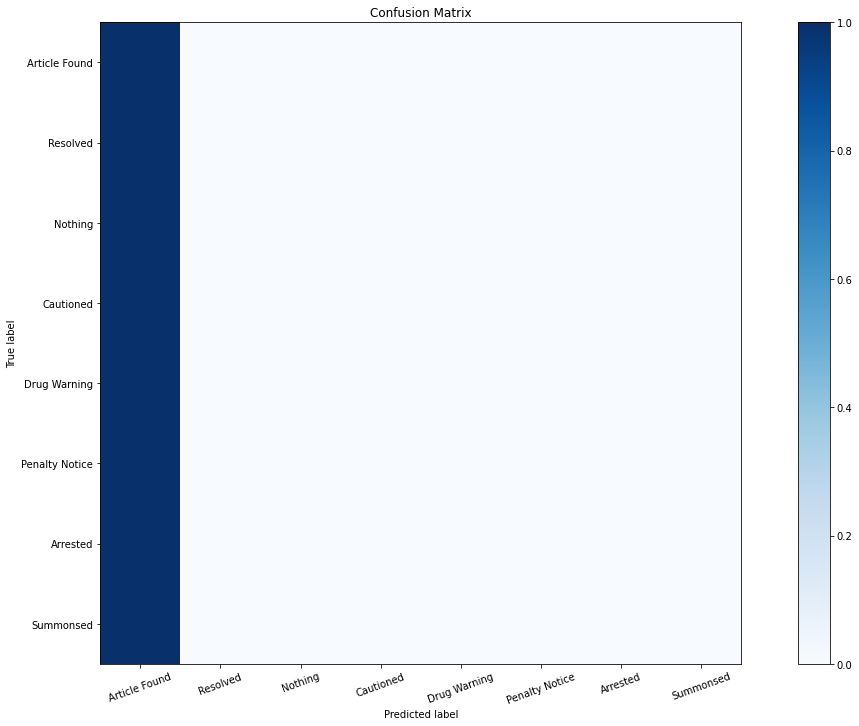

In [18]:
evaluate(model=svm_binary, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

It appears the SVM is only predicting No Action as its outcome, perhaps using SMOTE will improve the results.

## Using SMOTE
We use SMOTE to even out the unbalanced dataset

Class 0: 0.02%     (41)
Class 1: 0.68%     (1121)
Class 2: 65.41%     (108353)
Class 3: 0.1%     (167)
Class 4: 10.74%     (17788)
Class 5: 2.31%     (3824)
Class 6: 19.96%     (33067)
Class 7: 0.78%     (1290)
Total: 165651


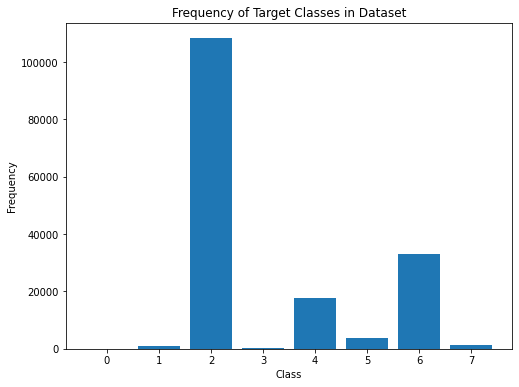

In [19]:
#The frequencies of each class in the dataset
usm.display_frequencies(data_encoded["Outcome"], figsize=(8,6))

Class 0: 0.02%     (32)
Class 1: 0.67%     (891)
Class 2: 65.49%     (86784)
Class 3: 0.1%     (131)
Class 4: 10.74%     (14229)
Class 5: 2.27%     (3014)
Class 6: 19.95%     (26436)
Class 7: 0.76%     (1003)
Total: 132520


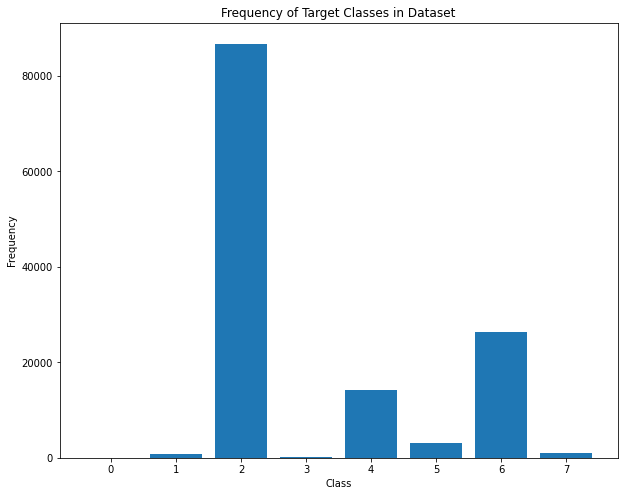

In [20]:
#Train/test split data_encoded
target = data_encoded["Outcome"]
features = data_encoded.drop('Outcome', axis=1)

usm.display_frequencies(y_train)

Class 0: 12.5%     (86784)
Class 1: 12.5%     (86784)
Class 2: 12.5%     (86784)
Class 3: 12.5%     (86784)
Class 4: 12.5%     (86784)
Class 5: 12.5%     (86784)
Class 6: 12.5%     (86784)
Class 7: 12.5%     (86784)
Total: 694272


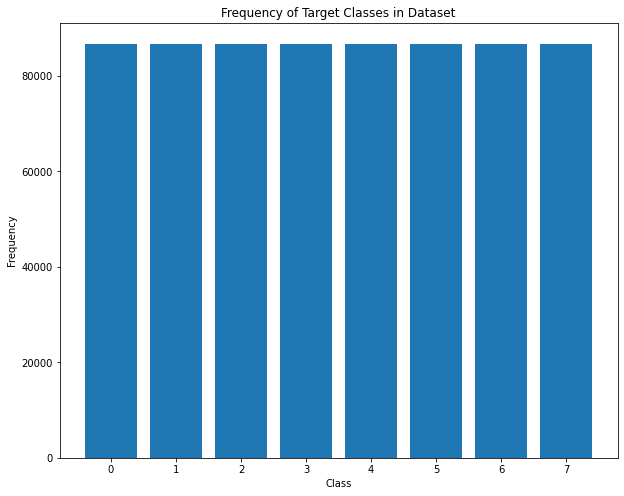

In [21]:
X_smote, y_smote = usm.smote_data(X_train, y_train)
usm.display_frequencies(y_smote)

In [23]:
**svm_smote = SVC(kernel = 'linear')
svm_smote.fit(X_smote, y_smote)

In [ ]:
evaluate(model=svm_smote, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

# Using Biased SMOTE (to majority class)
We over sample minority classes, but not to an extent that equalizes them to the majority class

In [ ]:
sampling_strategy = {0:30000, 1:30000, 2:86784, 3:30000, 4:60000, 5:50000, 6:70000, 7:30000}
X_smote, y_smote = usm.smote_data(X_train, y_train, sampling_strategy=sampling_strategy)
usm.display_frequencies(y_smote)

In [ ]:
svm_smote = SVC(kernel = 'linear')
svm_smote.fit(X_smote, y_smote)

In [ ]:
evaluate(model=svm_smote, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

## Using Biased SMOTE (to minority class)

In [ ]:
sampling_strategy = {0:160000, 1:160000, 2:86784, 3:160000, 4:140000, 5:150000, 6:130000, 7:160000}
X_smote, y_smote = usm.smote_data(X_train, y_train, sampling_strategy=sampling_strategy)
usm.display_frequencies(y_smote)

In [ ]:
svm_smote = SVC(kernel = 'linear')
svm_smote.fit(X_smote, y_smote)

In [ ]:
evaluate(model=svm_smote, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

## Using Grid Search to Tune Hyperparamaters
The most well balanced confusion matrix out of all svm models was the first SVM using smoting, so I will use Grid Search on this SVM model.

In [ ]:
X_smote, y_smote = usm.smote_data(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_param = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}
svm_search = GridSearchCV(SVC(), svm_param, verbose=1, cv=3, scoring="precision_weighted", n_jobs=-1)
svm_search.fit(X_smote, y_smote)

In [ ]:
evaluate(model=svm_search.best_estimator_, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target_classes=[0, 1, 2, 3, 4, 5, 6, 7], rotation=0, fontsize=22)

In [ ]:
print(svm_search.best_params_)